# Initial data check

This document is used for viewing and analyzing at the data different objects creates and playing around with how we should handle / use the data.

## Imports

In [68]:
# Use auto reload for helpers
%load_ext autoreload
%autoreload 1

# Liraries
import csv
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# Import notebook helper module
%aimport scripts.helpers
helpers = scripts.helpers # %aimport seems to have problems with import .. as .. in modules??

# Add implementations to path
sys.path.insert(0, '../implementations')

# Import modules from implementations
%aimport data_transformation.standarize_ms

# Set matplotlib to display figures in notebook
%matplotlib inline

# Set graph style
matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fill data

In [69]:
raw_data = helpers.read_raw_data('../data/initial_test_20160717/2016-07-17_knife.csv')
raw_data[:3]

[['2016-07-16 23:56:52.958690', 'NA', '1416', '1', '0', '0', '0', '0'],
 ['2016-07-16 23:56:52.958690', 'NA', '102819', '0', '1', '0', '0', '0'],
 ['2016-07-16 23:57:04.046822', 'KQ0', '113087', '0', '7', '1', '0', '0']]

#### Raw data format

0. Read identifier, unique for each "read" of values
1. Label - Identifier of object used to read data
2. MS since arduino started at read (will loop after 70 hours, see documentation
3. Sensor A0
4. Sensor A1
5. Sensor A2
6. Sensor A3
7. Sensor A4

### Split into readings

dict: key = reading, value = [reading]

In [70]:
raw_data_readings = helpers.split_data_based_on_readings(raw_data)
for k,v in raw_data_readings.items():
    print('reading {} with label {} has {} rows'.format(k, v[0][1], len(v)))

reading 2016-07-16 23:57:04.046822 with label KQ0 has 19 rows
reading 2016-07-16 23:57:38.259930 with label KQ3 has 39 rows
reading 2016-07-16 23:56:52.958690 with label NA has 2 rows
reading 2016-07-16 23:57:15.627268 with label KQ1 has 29 rows
reading 2016-07-16 23:57:52.086506 with label KQ4 has 1 rows
reading 2016-07-16 23:58:12.202638 with label KQ4 has 30 rows
reading 2016-07-16 23:57:27.301672 with label KQ2 has 36 rows


### Standarize the MS values to go from 0 ...

In [71]:
for v in raw_data_readings.values():
    data_transformation.standarize_ms(v, 2)

## Visualize readings

Note that readings from sensor a4 is not interesting at this time as this sensor is ment to measure the dishwasher...

On another note, the dishwasher should probably use a light sensor, so we might find a place for it! :)

### Reading 1

#### Create pandas dataframe

In [72]:
#id for current reading that is looked at
curr_reading_id = '2016-07-16 23:57:27.301672'

# Remove rows - They did not look very interesting
raw_data_readings[curr_reading_id] = raw_data_readings[curr_reading_id][1:24]

# Retransform MS for curr_reading
data_transformation.standarize_ms(raw_data_readings[curr_reading_id], 2)

reading1_df = pd.DataFrame(data=raw_data_readings[curr_reading_id], columns=['identifier', 'label', 'ms', 'a0', 'a1', 'a2', 'a3', 'a4'])
reading1_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3', 'a4']].astype(float)
reading1_df.head(-1)

,ms,a0,a1,a2,a3,a4
0,0.0,57.0,151.0,169.0,22.0,10.0
1,51.0,243.0,178.0,317.0,452.0,11.0
2,102.0,229.0,248.0,500.0,226.0,141.0
3,154.0,154.0,181.0,501.0,262.0,84.0
4,206.0,129.0,121.0,416.0,236.0,82.0
5,258.0,112.0,104.0,341.0,199.0,64.0
6,309.0,90.0,83.0,287.0,168.0,52.0
7,360.0,73.0,67.0,240.0,144.0,45.0
8,412.0,59.0,53.0,199.0,122.0,36.0
9,464.0,46.0,43.0,166.0,103.0,29.0


#### Add mean and max values

// TODO: Should be moved out to helpers, if data is helpful should be reusable when running final app.

In [73]:
reading1_df['mean'] = reading1_df[['a0','a1','a2','a3', 'a4']].mean(axis=1)
reading1_df['max'] = reading1_df[['a0','a1','a2','a3', 'a4']].max(axis=1)
reading1_df.shape

(23, 8)

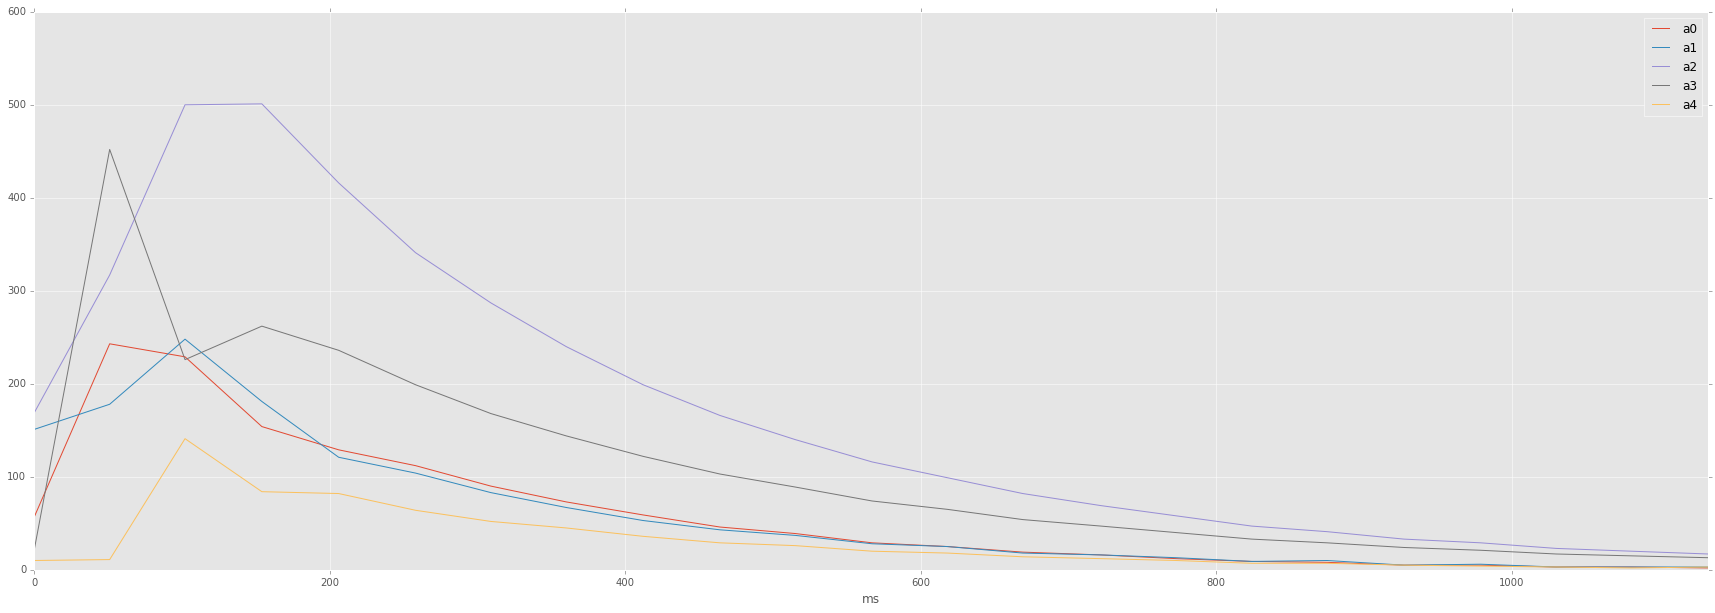

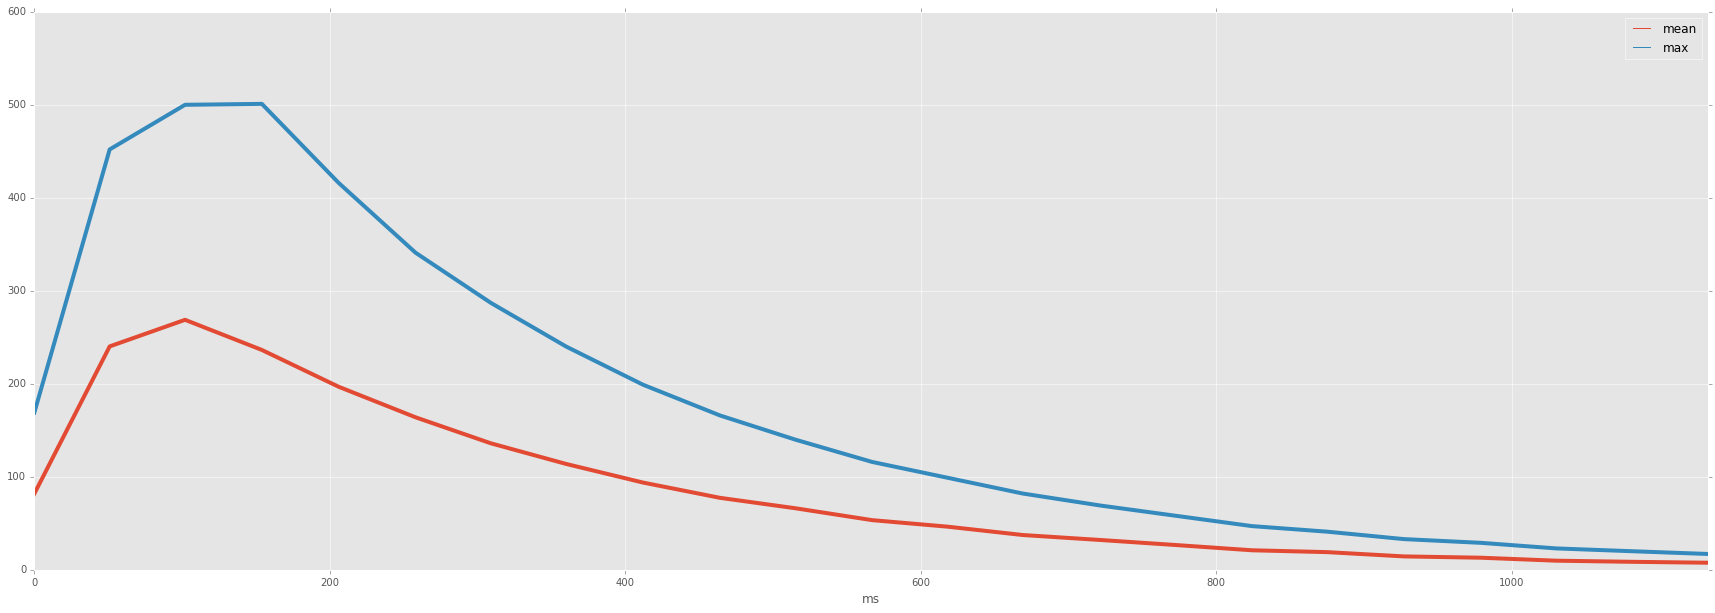

In [74]:
reading_1_a1_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3', 'a4']]
reading_1_a1_df.plot(x='ms', figsize=(30,10))

reading1_a0_df = reading1_df[['ms', 'mean', 'max']]
ax = reading1_a0_df.plot(x='ms', figsize=(30,10))
map(lambda x: x.set_linewidth(2), ax.lines)
ax.lines[-1].set_linewidth(4)
ax.lines[-2].set_linewidth(4)

### We need to see if we can represent the graph as a single dataset

Maybe take a sample of the values?

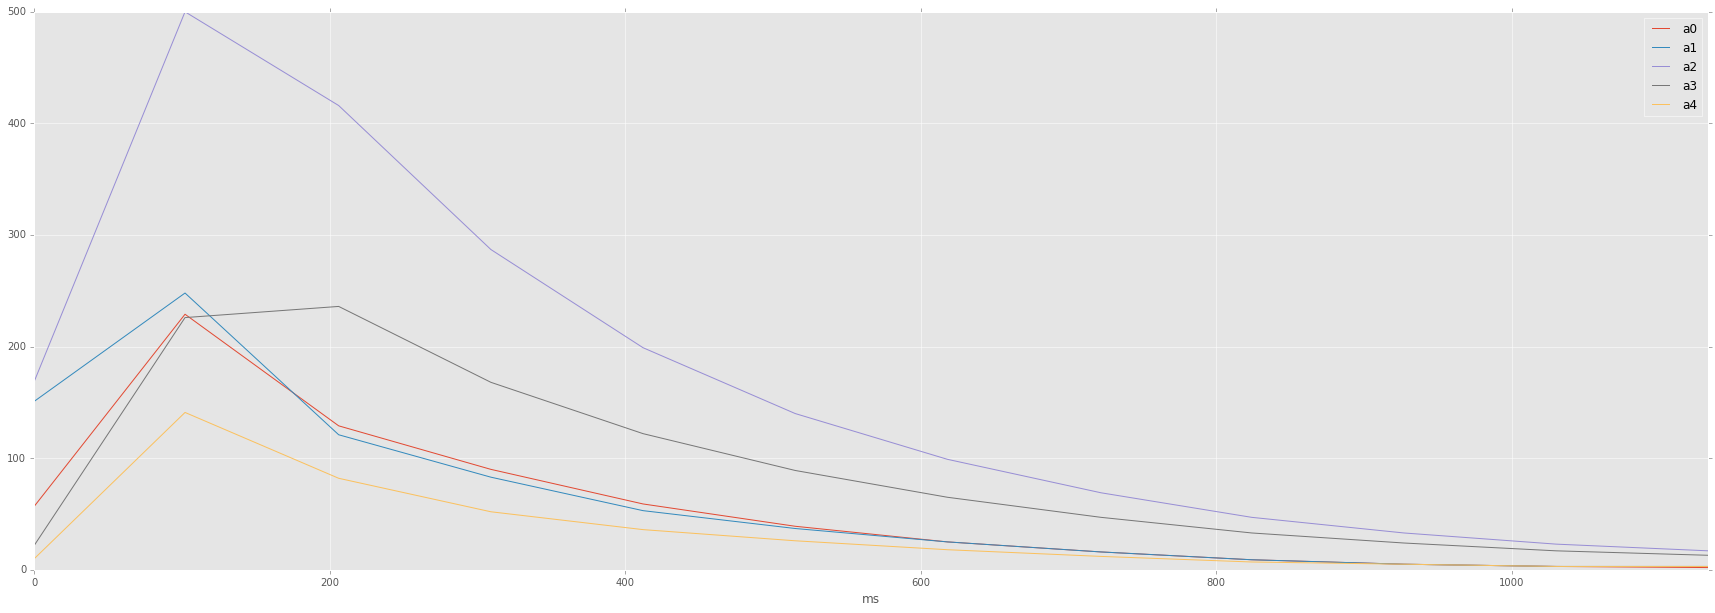

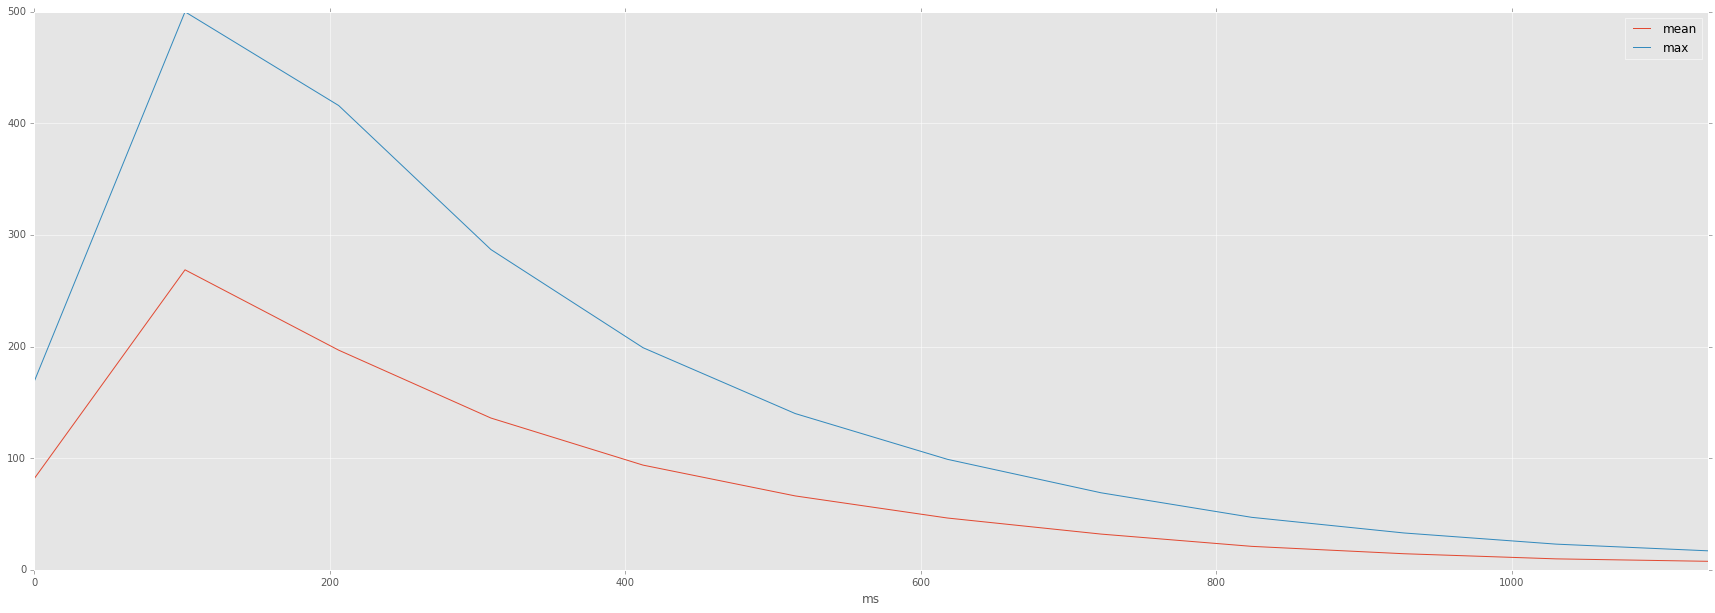

In [75]:
row_count = reading1_df.shape[0]
num_samples = 10
sample_steps = math.floor(row_count / num_samples)

reading1_samples_df = reading1_df.iloc[::sample_steps]
reading1_samples_df[['ms', 'a0', 'a1', 'a2', 'a3', 'a4']].plot(x='ms', figsize=(30,10))
reading1_samples_df[['ms', 'mean', 'max']].plot(x='ms', figsize=(30,10))